In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd drive/My Drive/Trabajo de Grado 2


/content/drive/My Drive/Trabajo de Grado 2


In [0]:
ls

Backup/                 CCN_ResNet50.ipynb  Pruebas/
CCN_DenseNet-169.ipynb  CCN_VGG16.ipynb     Trabajo_de_Grado_CCN.ipynb
CCN_ResNet34.ipynb      dataset/


# Importar Librerías

In [0]:
%matplotlib inline
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


# Cargar Set de Imágenes

In [0]:
dirname = os.path.join(os.getcwd(), 'dataset')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))


leyendo imagenes de  /content/drive/My Drive/Trabajo de Grado 2/dataset/
/content/drive/My Drive/Trabajo de Grado 2/dataset/malignos 1
/content/drive/My Drive/Trabajo de Grado 2/dataset/benignos 1497
Directorios leidos: 2
Imagenes en cada directorio [1498, 1799]
suma Total de imagenes en subdirs: 3297


# Creamos las etiquetas

In [0]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad Etiquetas Creadas: ",len(labels))

lunar_cancer=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    lunar_cancer.append(name[len(name)-1])
    indice=indice+1
    
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy


Cantidad Etiquetas Creadas:  3297
0 malignos
1 benignos


# Encuentra los números únicos de la etiquetas a entrenar

In [0]:
classes = np.unique(y)
nClasses = len(classes)
print('Total Numero de Salidas : ', nClasses)
print('Clases de Salida : ', classes)

Total Numero de Salidas :  2
Clases de Salida :  [0 1]


# Creamos Sets de Entrenamiento y Test

In [0]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Forma de los datos de entrenamiento : ', train_X.shape, train_Y.shape)
print('Forma de los datos de prueba : ', test_X.shape, test_Y.shape)

plt.figure(figsize=[5,5])

Forma de los datos de entrenamiento :  (2637, 224, 224, 3) (2637,)
Forma de los datos de prueba :  (660, 224, 224, 3) (660,)


<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

# Mostrar la primera imagen en Datos de entrenamiento.

Text(0.5, 1.0, 'Verdad Fundamental: 0')

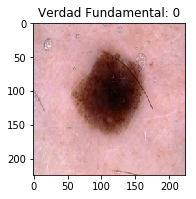

In [0]:
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Verdad Fundamental: {}".format(train_Y[0])) ## 

# Mostrar la primera imagen en los datos de entrenamiento.

Text(0.5, 1.0, 'Verdad Fundamental: 1')

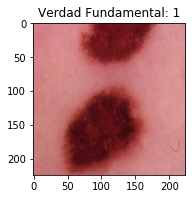

In [0]:
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Verdad Fundamental: {}".format(test_Y[0])) 

# Preprocesamos las imagenes

In [0]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

# Hacemos la Codificación One-Hot para la red

In [0]:
# Cambiar las etiquetas de categóricas a una codificación en caliente (one-hot encoding)
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Mostrar el cambio para la etiqueta de categoría usando la codificación de un solo uso (one-hot encoding)
print('Etiqueta Original:', train_Y[0])
print('Después de la Conversión a one-hot:', train_Y_one_hot[0])


Etiqueta Original: 0
Después de la Conversión a one-hot: [1. 0.]


# Creamos el Set de Entrenamiento y Validación

In [0]:
#Mezclar todo y crear los grupos de Entrenamiento y Pruebas
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
[ ]

print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(2109, 224, 224, 3) (528, 224, 224, 3) (2109, 2) (528, 2)


# Evaluamos con el Modelo ResNet50

In [0]:
#Cargamos las librerias para aplicar Resnet50
from keras.applications.resnet50 import ResNet50
from keras.optimizers import Adam, RMSprop
from keras.callbacks import ReduceLROnPlateau

# Establecemos un índice de aprendizaje (learning rate annealer)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-7)

In [0]:
input_shape = (224,224,3)
lr = 1e-3
epochs = 50
batch_size = 64

def create_ResNet50():  
  ResNet50_model = ResNet50(include_top=True, weights=None, input_tensor=None, input_shape=input_shape, pooling=None, classes=2)

  return ResNet50_model

ResNet50_model = create_ResNet50()  

ResNet50_model.compile(optimizer = Adam(lr) ,
              loss = "categorical_crossentropy", 
              metrics=["accuracy"])

ResNet50_model.summary()

W0831 04:30:19.127944 140615299704704 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [0]:
#Entrenamos el modelo con ResNet50
ResNet50 = ResNet50_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label),callbacks=[learning_rate_reduction])

W0831 04:30:33.765094 140615299704704 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2109 samples, validate on 528 samples
Epoch 1/50
2109/2109 [==============================] - 79s 37ms/step - loss: 0.7344 - acc: 0.7525 - val_loss: 1.8623 - val_acc: 0.6970
Epoch 2/50
2109/2109 [==============================] - 56s 27ms/step - loss: 0.4753 - acc: 0.7928 - val_loss: 0.8670 - val_acc: 0.7519
Epoch 3/50
2109/2109 [==============================] - 56s 27ms/step - loss: 0.4730 - acc: 0.8028 - val_loss: 7.0155 - val_acc: 0.4602
Epoch 4/50
2109/2109 [==============================] - 56s 27ms/step - loss: 0.4747 - acc: 0.7961 - val_loss: 2.9811 - val_acc: 0.4659
Epoch 5/50
2109/2109 [==============================] - 56s 27ms/step - loss: 0.4325 - acc: 0.8141 - val_loss: 8.5487 - val_acc: 0.4659
Epoch 6/50
2109/2109 [==============================] - 56s 27ms/step - loss: 0.4038 - acc: 0.8189 - val_loss: 0.5877 - val_acc: 0.8030
Epoch 7/50
2109/2109 [==============================] - 56s 27ms/step - loss: 0.3901 - acc: 0.8345 - val_loss: 0.6445 - val_acc: 0.7216
E

660/660 [==============================] - 7s 11ms/step
Perdida(loss) de Prueba: 0.5441331186077811
Exactitud(accuracy) de Prueba: 0.8500000007224805


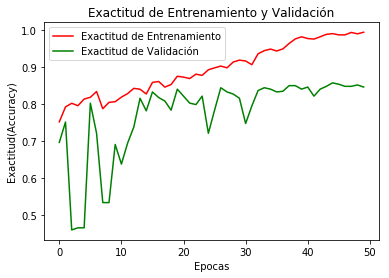

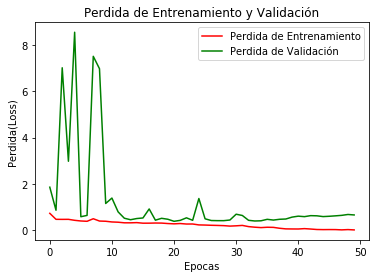

((660,), (660,))

In [0]:
######  Probamos y Validamos la Red ResNet50
test_eval_ResNet50 = ResNet50_model.evaluate(test_X, test_Y_one_hot, verbose=1)

print('Perdida(loss) de Prueba:', test_eval_ResNet50[0])
print('Exactitud(accuracy) de Prueba:', test_eval_ResNet50[1])

accuracy = ResNet50.history['acc']
val_accuracy = ResNet50.history['val_acc']
loss = ResNet50.history['loss']
val_loss = ResNet50.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Exactitud de Entrenamiento')
plt.plot(epochs, val_accuracy, 'g', label='Exactitud de Validación')
plt.title('Exactitud de Entrenamiento y Validación')
plt.xlabel('Epocas')
plt.ylabel('Exactitud(Accuracy)')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Perdida de Entrenamiento')
plt.plot(epochs, val_loss, 'g', label='Perdida de Validación')
plt.title('Perdida de Entrenamiento y Validación')
plt.xlabel('Epocas')
plt.ylabel('Perdida(Loss)')
plt.legend()
plt.show()

predicted_classes2 = ResNet50_model.predict(test_X)

predicted_classes=[]
for predicted_ResNet50 in predicted_classes2:
    predicted_classes.append(predicted_ResNet50.tolist().index(max(predicted_ResNet50)))
predicted_classes=np.array(predicted_classes)

predicted_classes.shape, test_Y.shape

Encontraron 561 Etiquetas Correctas


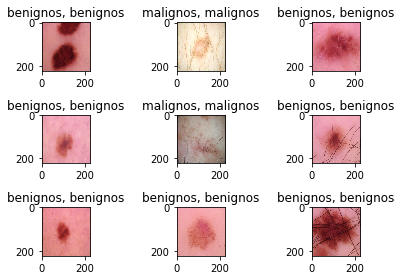

In [0]:
correct = np.where(predicted_classes==test_Y)[0]
print("Encontraron %d Etiquetas Correctas" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(224,224,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(lunar_cancer[predicted_classes[correct]],
                                                    lunar_cancer[test_Y[correct]]))

    plt.tight_layout()

Encontraron 99 Etiquetas Incorrectas


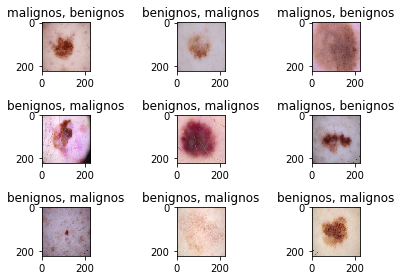

In [0]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Encontraron %d Etiquetas Incorrectas" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(224,224,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(lunar_cancer[predicted_classes[incorrect]],
                                                    lunar_cancer[test_Y[incorrect]]))
    plt.tight_layout()

In [0]:
target_names = ["Clase {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Clase 0       0.83      0.81      0.82       283
     Clase 1       0.86      0.88      0.87       377

    accuracy                           0.85       660
   macro avg       0.85      0.85      0.85       660
weighted avg       0.85      0.85      0.85       660

